In [1]:
import csv
import pandas as pd
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import MultipleLocator
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# The German Traffic Sign Recognition Benchmark
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
# grayscale type image can not be shown by plt.imshow function
# image array: for int: [0..255], for float: [0..1]
def readTrafficSigns(rootpath, img_size=(32,32), grayscale=False):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    
    Loads an image from file, resize to img_size and return as numpy array.
    Values are normalized to range [0,1].
    :param img: image path
    :param img_size: image size as tuple (width, height)
    :return: ndarray (width, height, 3) or (width, height)
    
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels
    '''
    
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            img = prefix + row[0]
            if grayscale == True:
                img = load_img(img, color_mode='grayscale')
            else:
                img = load_img(img, color_mode='rgb')

            img = img_to_array(img)
            img = img/255
            img = img.clip(0, 1)
#             img = exposure.equalize_hist(img)
            
            images.append(img)
            labels.append(int(row[7])) # the 8th column is the label
        gtFile.close()
    return np.array(images), labels

In [7]:
train_path = 'C:/Users/ElementQi/Desktop/dataScience/pythonProject/data/GTSRB/Final_Training/Images'
test_path = 'C:/Users/ElementQi/Desktop/dataScience/pythonProject/data/GTSRB/Final_Test/Images'

img_size = (32,32)
gray=True
X_train, y_train = readTrafficSigns(train_path, img_size=img_size)

In [8]:
X_train[: 30]

array([array([[[0.29411766, 0.30588236, 0.3137255 ],
               [0.2901961 , 0.29803923, 0.30588236],
               [0.3372549 , 0.34117648, 0.32941177],
               ...,
               [0.26666668, 0.29411766, 0.29411766],
               [0.25490198, 0.27058825, 0.26666668],
               [0.25882354, 0.2627451 , 0.25882354]],

              [[0.3254902 , 0.32941177, 0.3372549 ],
               [0.3137255 , 0.3137255 , 0.32156864],
               [0.3529412 , 0.34901962, 0.32941177],
               ...,
               [0.28627452, 0.3019608 , 0.30588236],
               [0.29803923, 0.30588236, 0.29411766],
               [0.3137255 , 0.3137255 , 0.30588236]],

              [[0.30588236, 0.30588236, 0.3137255 ],
               [0.3372549 , 0.33333334, 0.3372549 ],
               [0.3647059 , 0.3529412 , 0.35686275],
               ...,
               [0.28235295, 0.2901961 , 0.28235295],
               [0.28627452, 0.2901961 , 0.27058825],
               [0.30588236, 0.30588

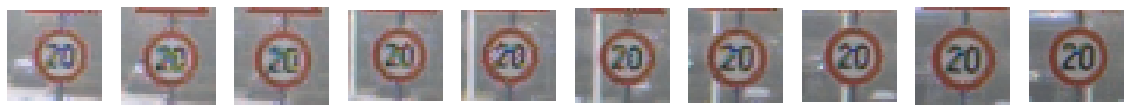

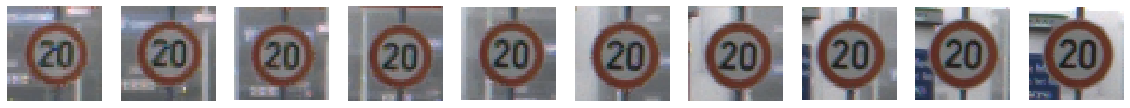

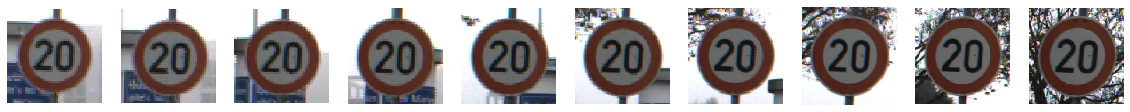

In [29]:
fig = plt.figure(figsize=(20,5))
for i in range(60, 70):
    plt.subplot(1,10,i-60+1)
    plt.axis('off')
    plt.imshow(X_train[i])
plt.show()

fig = plt.figure(figsize=(20,5))
for i in range(70, 80):
    plt.subplot(1,10,i+1-70)
    plt.axis('off')
    plt.imshow(X_train[i])
plt.show()

fig = plt.figure(figsize=(20,5))
for i in range(80, 90):
    plt.subplot(1,10,i+1-80)
    plt.axis('off')
    plt.imshow(X_train[i])
plt.show()

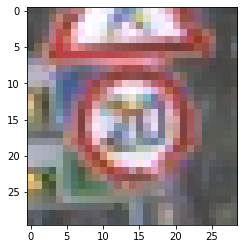

In [9]:
plt.imshow(X_train[0])

In [18]:
list(range(11, 21))

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]